In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

# 1. iris 회귀식, RMSE 값

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
irisDF = pd.DataFrame(iris.data, columns= iris.feature_names)

In [5]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
x = irisDF['sepal width (cm)']
y = iris.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2020)

In [10]:
from sklearn.linear_model import LinearRegression
sim_iris = LinearRegression()

In [11]:
sim_iris.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = sim_iris.predict(x_test.values.reshape(-1,1))

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.21907490726778522

In [14]:
sim_iris.coef_, sim_iris.intercept_

(array([-0.76164685]), 3.3496805314602467)

- 도출된 회귀식 -0.76 * 3.34

In [15]:
iris_regr = DecisionTreeRegressor(max_depth=5)

In [16]:
iris_regr.fit(x_train.values.reshape(-1,1), y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
y_pred_iris = iris_regr.predict(x_test.values.reshape(-1,1))

In [18]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_iris))

In [19]:
RMSE

0.6802640843785868

# 3. iris데이터 차원축소, 군집화 성능 평가

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn. datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

In [51]:
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [52]:
Kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=2020)
Kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2020, tol=0.0001, verbose=0)

In [53]:
irisDF['target'] = iris.target
irisDF['cluster'] = Kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       0          50
1       3          26
        4          24
2       1          24
        2          12
        3          13
        4           1
Name: sepal_length, dtype: int64

In [54]:
pca = PCA(n_components=2)

pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


In [55]:
# marker0_ind = irisDF[irisDF['cluster']==0].index
# marker1_ind = irisDF[irisDF['cluster']==1].index

# plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
# plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')

# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title(' 2 Clusters Visualization by 2 PCA Components')
# plt.show()

In [58]:
# marker0_ind = irisDF[irisDF['cluster']==0].index
# marker1_ind = irisDF[irisDF['cluster']==1].index
# marker2_ind = irisDF[irisDF['cluster']==2].index

# plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
# plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
# plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title(' 3 Clusters Visualization by 2 PCA Components')
# plt.show()

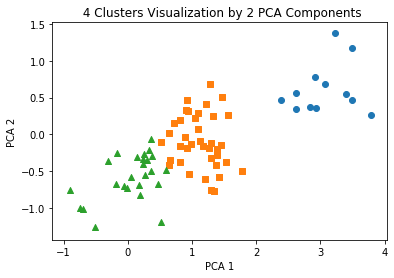

In [59]:
marker2_ind = irisDF[irisDF['cluster']==2].index
marker3_ind = irisDF[irisDF['cluster']==3].index
marker4_ind = irisDF[irisDF['cluster']==4].index

plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker3_ind, 'pca_x'], y=irisDF.loc[marker3_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker4_ind, 'pca_x'], y=irisDF.loc[marker4_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(' 4 Clusters Visualization by 2 PCA Components')
plt.show()

In [63]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [64]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
Kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=2020).fit(irisDF)
irisDF['cluster'] = Kmeans.labels_

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shaep', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples
averge_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis score : {0:.3f}'.format(averge_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shaep (150,)
붓꽃 데이터 세트 Silhouette Analysis score : 0.489


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.825035
1,4.9,3.0,1.4,0.2,0,0.775851
2,4.7,3.2,1.3,0.2,0,0.794843


In [65]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.759235
1    0.415810
2    0.342779
3    0.277012
4    0.418172
Name: silhouette_coeff, dtype: float64

# 4. 미드웨이 감정분석

In [72]:
import numba as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
reviwe_df = pd.read_csv('./data/midway.tsv', header=0, sep="\t", quoting=3)
reviwe_df.head(3)

,Unnamed: 0,평점,일시,감상평
0,0,9,2019.12.31 09:48,미드웨이가 재밌으면 추천 백두산이 재밌으면 비추
1,1,10,2019.12.31 10:41,저 해전이 있었기에 우리나라 광복도 가능 했음
2,2,10,2019.12.31 09:38,백두산 상영관 대폭줄이고 미드웨이 상영관 대폭늘려라


In [99]:
print(reviwe_df['감상평'][3])

방금 개봉했는데 1점 준애는 뭐냐 ㅋㅋ 일본놈이냐? 이제 광고돌고 있을 시간이다.


# 2. 폐암데이터 SVM, 결정트리, 로지스틱 회귀로 1년 생존여부 예측

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [127]:
ts = pd.read_csv('./data/ThoraricSurgery.csv', header=0, sep="\t", quoting=3)
ts.head()

,"293,1,3.8,2.8,0,0,0,0,0,0,12,0,0,0,1,0,62,0"
0,"1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0"
1,"8,2,3.19,2.5,1,0,0,0,1,0,11,0,0,1,1,0,66,1"
2,"14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1"
3,"17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0"
4,"18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0"


In [114]:
print(ts.head())

    293,1,3.8,2.8,0,0,0,0,0,0,12,0,0,0,1,0,62,0
0   1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
1    8,2,3.19,2.5,1,0,0,0,1,0,11,0,0,1,1,0,66,1
2  14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
3  17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
4  18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0


In [120]:
dt_dec = DecisionTreeClassifier(random_state=2020)
dt_dec.fit(x_train.values.reshape(-1,1), y_train)
dt_dec_pred = dt_dec.predict(x_test.values.reshape(-1,1))
accuracy_score(y_test, dt_dec_pred)
# print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

0.43333333333333335

In [122]:
dt_log =LogisticRegression(random_state=2020)
dt_log.fit(x_train.values.reshape(-1,1), y_train)
dt_log_pred = dt_log.predict(x_test.values.reshape(-1,1))
accuracy_score(y_test, dt_log_pred)


0.43333333333333335

In [88]:
# dt_clf = DecisionTreeClassifier(random_state=2020)
# dt_clf.fit (x_train, y_train)